In [1]:
import os
os.chdir('../../..')

In [2]:
os.listdir()

['LICENSE.md',
 'progun_forum_corpus.txt',
 'convokit',
 '.DS_Store',
 'requirements.txt',
 'progun_corpus.txt',
 'skipped_users.json',
 'Makefile',
 'website',
 'datasets',
 'tests',
 'README.md',
 'setup.py',
 '.gitignore',
 'ldavis_prepared_8',
 'CONTRIBUTING.md',
 'examples',
 'doc',
 'ldavis_prepared_news_8',
 'antigun_forum_corpus.txt',
 '.git',
 'antigun_corpus.txt',
 '.idea']

In [3]:
from convokit import Corpus, LanguageModel, download

In [4]:
forum_corpus = Corpus(filename="/Users/calebchiam/Documents/GitHub/cs6742-fork/datasets/gun_debate_forum_corpus_2k")

In [5]:
forum_corpus.print_summary_stats()

Number of Users: 1385
Number of Utterances: 285586
Number of Conversations: 2146


In [6]:
from collections import defaultdict
leanings = defaultdict(int)
for user in forum_corpus.iter_users():
    if 'lean' in user.meta:
        leanings[user.meta['lean']] += 1 

In [7]:
leanings

defaultdict(int,
            {'Centrist ': 51,
             'Libertarian - Right ': 53,
             'Liberal ': 73,
             'Independent ': 176,
             'Libertarian ': 74,
             'Undisclosed ': 278,
             'Other ': 135,
             'Very Conservative ': 62,
             'Conservative ': 149,
             'Libertarian - Left ': 22,
             'Slightly Liberal ': 43,
             'Private ': 15,
             'Progressive ': 55,
             'Slightly Conservative ': 31,
             'Moderate ': 53,
             'Very Liberal ': 26,
             'Socialist ': 32,
             'Communist ': 7})

In [8]:
sum(leanings.values())

1335

In [9]:
for user in forum_corpus.iter_users():
    if 'lean' in user.meta:
        user.meta['lean'] = user.meta['lean'].strip() # get rid of extra whitespace

In [10]:
# Liberal, Very Liberal, Progressive
# Libertarian - Right, Conservative, Very Conservative

In [11]:
random_user = next(forum_corpus.iter_users())

In [12]:
antigun_users = []
progun_users = []

for user in forum_corpus.iter_users():
    lean = user.meta.get('lean', None)
    if lean in {'Liberal', 'Very Liberal', 'Progressive'}:
        antigun_users.append(user)
    elif lean in {'Libertarian - Right', 'Conservative', 'Very Conservative'}:
        progun_users.append(user)

In [13]:
len(antigun_users)

154

In [14]:
len(progun_users)

264

## Distribution of utterances

In [15]:
import matplotlib.pyplot as plt

In [16]:
num_utts_antigun_users = [len(list(user.iter_utterances())) for user in antigun_users]
num_utts_progun_users = [len(list(user.iter_utterances())) for user in progun_users]

(array([134.,   6.,   4.,   3.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 1.82550e+02, 3.64100e+02, 5.45650e+02, 7.27200e+02,
        9.08750e+02, 1.09030e+03, 1.27185e+03, 1.45340e+03, 1.63495e+03,
        1.81650e+03, 1.99805e+03, 2.17960e+03, 2.36115e+03, 2.54270e+03,
        2.72425e+03, 2.90580e+03, 3.08735e+03, 3.26890e+03, 3.45045e+03,
        3.63200e+03]),
 <a list of 20 Patch objects>)

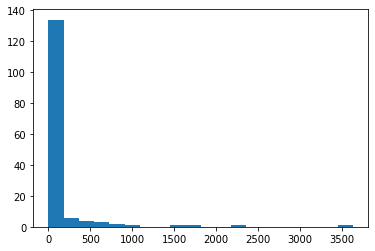

In [17]:
plt.hist(num_utts_antigun_users, bins=20)

Some people say a LOT.

(array([254.,   8.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 1.76010e+03, 3.51920e+03, 5.27830e+03, 7.03740e+03,
        8.79650e+03, 1.05556e+04, 1.23147e+04, 1.40738e+04, 1.58329e+04,
        1.75920e+04, 1.93511e+04, 2.11102e+04, 2.28693e+04, 2.46284e+04,
        2.63875e+04, 2.81466e+04, 2.99057e+04, 3.16648e+04, 3.34239e+04,
        3.51830e+04]),
 <a list of 20 Patch objects>)

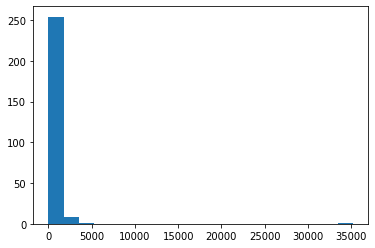

In [18]:
plt.hist(num_utts_progun_users, bins=20) # holy shit that guy at 7500

In [19]:
import numpy as np

In [20]:
print(np.median(num_utts_antigun_users))
print(np.mean(num_utts_antigun_users))

22.5
139.91558441558442


In [21]:
print(np.median(num_utts_progun_users))
print(np.mean(num_utts_progun_users))

13.0
327.9734848484849


To normalize, we take up to 5 utterances per user. If the user has <= 5 utterances, take all of them.

In [22]:
from random import sample

In [23]:
progun_utts = []
for user in progun_users:
    user_utts = list(user.iter_utterances())
    if len(user_utts) <= 10:
        progun_utts.extend(user_utts)
    else:
        progun_utts.extend(sample(user_utts, 10))

In [24]:
antigun_utts = []
for user in antigun_users:
    user_utts = list(user.iter_utterances())
    if len(user_utts) <= 10:
        antigun_utts.extend(user_utts)
    else:
        antigun_utts.extend(sample(user_utts, 10))

In [25]:
len(antigun_utts)

1165

In [26]:
len(progun_utts)

1822

In [27]:
[utt.text for utt in antigun_utts[:10]]

["You're recreational/decorative need is outweighed by casualties, Guns are not a necessity Car are this is why legislation seek to make safer and not ban them.",
 "Go ahead and make a good argument for owning a gun. There are non yet that I've come across.",
 'They have been for thousands of years.',
 'And if I told you I spoke to god yesterday do you accept that as proof god exists ? I was able to protect myself from all threats last night without any guns. How do you explain that ?',
 'You are so quick to judge immigrants And yes, Lt Col Vindman, of the US Army, who gave evidence to the House Committee on Intelligence today, wasn\'t brought up in this country either ...your claims about my veracity are hilarious.... Simple minds are easily amused...oh look a... - Quote ....given how many legal gun owners here are, your doom and gloom nonsense is just that.... Legal gun owners like Stephen Paddock (up to the point where he became a mass shooter) ...and I still don\'t believe that pub

In [28]:
[utt.text for utt in progun_utts[:10]]

['using the Wickard "logic" the federal government could regulate the amount of sugar that cute little 12 year old girl with the ponytail is selling you for a quarter',
 "He's been retired for years-his Heller dissent proved he overstayed his welcome",
 'Yeah I remember one of my friends saying he was going to apply to Harvard medical school. Another student said "why bother, you only have a 6% chance of getting in" and he said, yeah but if I don\'t apply I am guaranteed a zero chance of getting in (he got in)',
 'none of this matters given disarming potential victims will make things worse and that is the only solution gun banners want to do',
 'and a couple just killed a wanted murderous fugitive who was going to kill them so what? Look, we get the fact that you are afraid to own a gun my suggestion as a professional in this field-DO NOT OWN A GUN but quit trying to tell us who are well trained in their use to not own them and stop advocating banning firearms or limiting what honest 

In [29]:
def clean_text(txt):
    return txt.replace("\n", " ").replace('\x92', "'")

In [30]:
progun_text = ''
for utt in progun_utts:
    if len(utt.text) >= 25:
        if utt.text.endswith('.'):
            progun_text += clean_text(utt.text) + ' '
        else:
            progun_text += clean_text(utt.text) + '. '

In [31]:
antigun_text = ''
for utt in antigun_utts:
    if len(utt.text) >= 25:
        if utt.text.endswith('.'):
            antigun_text += clean_text(utt.text) + ' '
        else:
            antigun_text += clean_text(utt.text) + '. '

In [32]:
len(progun_text)

710540

In [33]:
len(antigun_text)

400802

In [34]:
from nltk import sent_tokenize

In [35]:
with open('progun_forum_corpus.txt', 'w') as f:
    for sentence in sent_tokenize(progun_text):
        if len(sentence) > 5:
            f.write(sentence)
            f.write("\n")

In [36]:
with open('antigun_forum_corpus.txt', 'w') as f:
    for sentence in sent_tokenize(antigun_text):
        if len(sentence) > 5:
            f.write(sentence)
            f.write("\n")

## Training step

In [37]:
lm = LanguageModel(SRILM_path='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/srilm-1.7.3',
                  working_dir='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/',
                  lm_output_path='progun_forum_2.lm',
                  lm_type='laplace',
                  count_output_path='progun_forum_counts.txt',
                  order=2,
                  verbose=True)

In [38]:
lm.train('progun_forum_corpus.txt')

In [39]:
lm.str_perplexity("I love guns.")

file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/4571617107665466448.txt: 1 sentences, 3 words, 0 OOVs
0 zeroprobs, logprob= -10.5951 ppl= 445.425 ppl1= 3401.727


445.425

In [40]:
lm.str_perplexity("I hate guns.")

file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/384409342118227312.txt: 1 sentences, 3 words, 0 OOVs
0 zeroprobs, logprob= -11.549 ppl= 771.3454 ppl1= 7074.002


771.3454

In [44]:
lm.str_perplexity("We should have a right to arm ourselves.")

file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/7135832805376208926.txt: 1 sentences, 8 words, 0 OOVs
0 zeroprobs, logprob= -28.27347 ppl= 1385.15 ppl1= 3421.244


1385.15

In [43]:
lm.str_perplexity("We should not have a right to arm ourselves.")

file /Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/temp/3375551998011995050.txt: 1 sentences, 9 words, 0 OOVs
0 zeroprobs, logprob= -31.09565 ppl= 1286.96 ppl1= 2851.494


1286.96

In [45]:
lm2 = LanguageModel(SRILM_path='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/srilm-1.7.3',
                  working_dir='/Users/calebchiam/Documents/GitHub/cs6742-fork/convokit/SRILM/dump/',
                  lm_output_path='antigun_forum_2.lm',
                  lm_type='laplace',
                  count_output_path='antigun_forum_counts.txt',
                  order=2,
                  verbose=False)

In [46]:
lm2.train('antigun_forum_corpus.txt')

In [47]:
lm2.str_perplexity("I love guns.")

436.8381

In [48]:
lm2.str_perplexity("I hate guns.")

614.6817

In [49]:
lm2.str_perplexity("We have a right to arm ourselves.")

1582.907

In [50]:
lm2.str_perplexity("We do not have a right to arm ourselves.")

1348.064